In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [36]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=2)

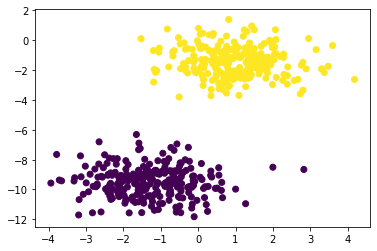

In [37]:
plt.scatter(X[:, 0], X[:, 1],c = y)
plt.show()

In [38]:
y = y.reshape(-1, 1)

In [39]:
y.shape

(500, 1)

In [40]:
ones = np.ones((500,1))
X_ = np.hstack((ones, X))

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_, y, test_size=0.33, random_state=42)

In [43]:
X_train.shape

(335, 3)

In [44]:
X_test.shape

(165, 3)

In [45]:
y_train.shape

(335, 1)

In [46]:
y_test.shape

(165, 1)

# Logistic Regression

In [47]:
def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-1*x))

In [48]:
def hypothesis(X, theta):
    """
    X - np array (m,n+1)
    theta - np arrary (n+1, 1)
    """
    return sigmoid( np.dot(X,theta) ) 

In [49]:
def error(X, y, theta):
    """
    params:
        X - np array (m,n+1)
        y - np array (m, 1)
        theta - np arrary (n+1, 1)
    
    return :
        scalar value = loss value
    """

    
    y_hat = hypothesis(X, theta) # (m,1)
    err = (y * np.log(y_hat) + ((1- y) * np.log(1-y_hat)) ).mean()
    
    return -err

In [50]:
def gradient(X, y, theta):
    """
    X - np array (m,n+1)
    y - np array (m, 1)
    theta - np arrary (n+1, 1)
    """
    

    
    y_hat = hypothesis(X, theta)
    grad = np.dot( X.T , (y_hat - y) )
   
    return grad/X.shape[0]

In [57]:
def gradient_descent(X, y, lr =0.5, max_itr = 500):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        
        # Updation Rule
        theta = theta - lr*grad
        
    return (theta, error_list)

In [58]:
opt_theta, error_list = gradient_descent(X_train, y_train)

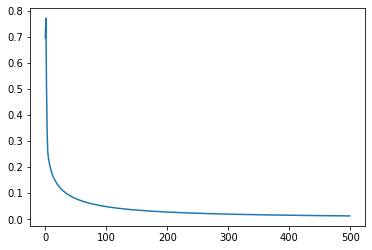

In [59]:
plt.plot(error_list)

In [64]:
opt_theta

array([[5.38282715],
       [1.19101276],
       [1.12250365]])

In [68]:
x1_rv = np.arange(-4, 5)

In [69]:
x2_rv = - (opt_theta[0] + opt_theta[1]*x1_rv) / opt_theta[2]  

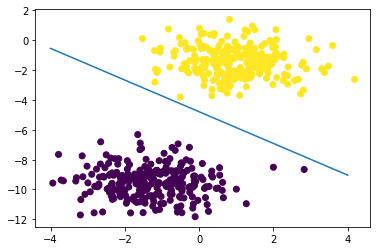

In [74]:
plt.scatter(X[:, 0], X[:, 1], c = y.reshape(-1,))
plt.plot(x1_rv, x2_rv)
plt.show()

In [88]:
y_pred = hypothesis(X_test, opt_theta)

In [91]:
y_pred = np.round(y_pred).astype('int')

In [94]:
# Accuracy
(y_pred == y_test).mean()

1.0

# sklearn Logistic Reg

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
model = LogisticRegression()

In [99]:
model.fit(X_train, y_train)

/Users/mohituniyal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mohituniyal/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
model.score(X_test, y_test)

1.0

In [101]:
model.score(X_train, y_train)

1.0

In [103]:
ypred = model.predict(X_test)

In [104]:
model.intercept_

array([2.53864798])

In [105]:
model.coef_

array([[2.53864798, 0.9694276 , 1.04969243]])